In [1]:
import tensorflow.keras as keras
import tensorflow.compat.v1 as tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plotAxis

In [2]:
def processData(X, Y,X1,Y1):
    x_train = X / 255
    x_test = X1 / 255
    y_train = keras.utils.to_categorical(Y)
    y_test = keras.utils.to_categorical(Y1)
    return x_train, x_test,y_train,y_test

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train, x_test,y_train,y_test = processData(x_train,y_train,x_test,y_test)

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
def getImages(image, label):
  img = tensorflow.image.resize(image, (227, 227))
  return img, label

In [5]:
  trainingData = tensorflow.data.Dataset.from_tensor_slices((x_train, y_train))
  trainingData = (trainingData.map(getImages).batch(batch_size=32, drop_remainder=True))  
  testingData = tensorflow.data.Dataset.from_tensor_slices((x_test, y_test))
  testingData = (testingData.map(getImages).batch(batch_size=32, drop_remainder=True))

In [6]:
pretrainedModel = keras.applications.ResNet101(include_top=False,weights='imagenet',input_tensor=keras.Input(shape=(227, 227, 3)))

171446536/171446536 [==============================] - 1s 0us/step


In [7]:
model = Sequential()
model.add(pretrainedModel)
model.add(Flatten())
model.add(layers.Dense(2048, activation=('relu')))
model.add(layers.Dropout(.4)) 
model.add(layers.Dense(1024, activation=('relu')))
model.add(layers.Dropout(.3))  
model.add(layers.Dense(512, activation=('relu'), name="Deep_feature"))
model.add(layers.Dropout(.2))  
model.add(layers.Dense(10, activation=('softmax')))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 module_wrapper (ModuleWrapp  (None, 131072)           0         
 er)                                                             
                                                                 
 dense (Dense)               (None, 2048)              268437504 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                        

In [8]:

learning_rate=0.00003
model.compile(optimizer=Adam(learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
loss, accuracy = model.evaluate(testingData)

312/312 [==============================] - 71s 191ms/step - loss: 2.4957 - accuracy: 0.0942


In [12]:
finalResult = model.fit(trainingData, epochs=6,verbose=1, validation_data=(testingData))

Epoch 1/6
1562/1562 [==============================] - 1189s 715ms/step - loss: 0.5696 - accuracy: 0.8279 - val_loss: 0.2230 - val_accuracy: 0.9301
Epoch 2/6
1562/1562 [==============================] - 1138s 729ms/step - loss: 0.1456 - accuracy: 0.9536 - val_loss: 0.2371 - val_accuracy: 0.9349
Epoch 3/6
1562/1562 [==============================] - 1139s 729ms/step - loss: 0.0832 - accuracy: 0.9740 - val_loss: 0.3116 - val_accuracy: 0.9257
Epoch 4/6
1562/1562 [==============================] - 1115s 714ms/step - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.2605 - val_accuracy: 0.9410
Epoch 5/6
1562/1562 [==============================] - 1112s 712ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.1977 - val_accuracy: 0.9479
Epoch 6/6
1562/1562 [==============================] - 1113s 713ms/step - loss: 0.0443 - accuracy: 0.9873 - val_loss: 0.2454 - val_accuracy: 0.9388


In [13]:
loss, accuracy = model.evaluate(testingData)

312/312 [==============================] - 60s 191ms/step - loss: 0.2454 - accuracy: 0.9388


In [14]:
print('loss:',loss)
print('Accuracy:',100*accuracy,'%')

loss: 0.24543265998363495
Accuracy: 93.88020634651184 %


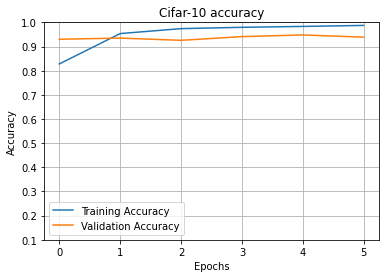

In [15]:
figure = plotAxis.gcf()
plotAxis.plot(finalResult.history['accuracy'],label='Training Accuracy')
plotAxis.plot(finalResult.history['val_accuracy'],label='Validation Accuracy')
plotAxis.legend()
plotAxis.xlabel('Epochs')
plotAxis.ylabel('Accuracy')
plotAxis.axis(ymin=0.1,ymax=1)
plotAxis.grid()
plotAxis.title('Cifar-10 accuracy')
plotAxis.show()